In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

img_1 = cv2.imread('/home/anas/Downloads/image-1.png')
cv2.imshow('original',img_1)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()

img_gray = cv2.imread('/home/anas/Downloads/image-1.png',cv2.IMREAD_GRAYSCALE)
cv2.imshow('gray',img_gray)
if cv2.waitKey(0) & 0xFF == ord('q'):
    cv2.destroyAllWindows()



In [2]:
img_arr = np.asarray(img_gray)
print(len(img_arr))
print(img_gray.shape)

231
(231, 440)


In [3]:
flat = img_arr.flatten()
print(type(flat))
hist = np.bincount(flat,minlength=256)
print(hist)

<class 'numpy.ndarray'>
[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0   35   14  331    1  463    2  689    0  974    2
  864  976    3 1106    0 1067 1434    4 3783 3828    0 2548 2815    1
 2935 1949    0 1426 1035  999    0 1066 1270 1541    1 1790 2429 1994
 1311    0 1084  981  973 1064  785  688  564    2  493  494  487  487
  460  465  486  490  461  528  523  553  571  618  680  674  887  813
  827 2160 3214 5456 8658 2973 1254 1491 1471 1001  790 1151  642  641
  639  865 1429 1158 1211 1199 1615  505  339  268  313  151  142  319
  134  181  254  124  115  249  136  365  216  186  327  171  281   22
    0    0    0    0    0    0    0    0    0    0   

In [4]:
x =np.array(range(257))
print(x[:-1])

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

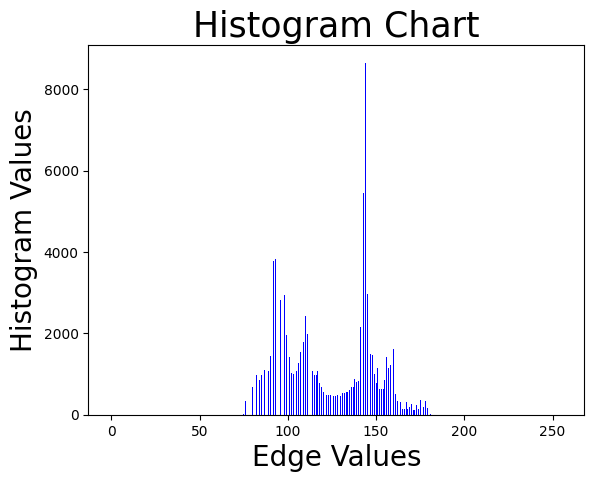

In [5]:
plt.xlabel('Edge Values', fontsize=20)
plt.ylabel('Histogram Values', fontsize=20)
plt.title('Histogram Chart', fontsize=25)
plt.bar(x[:-1], hist, width=0.5, color='blue')
plt.show()

In [6]:
pdf = hist/np.sum(hist)
print(type(pdf))
print(len(pdf))
print("sum=",np.sum(hist))

<class 'numpy.ndarray'>
256
sum= 101640


256


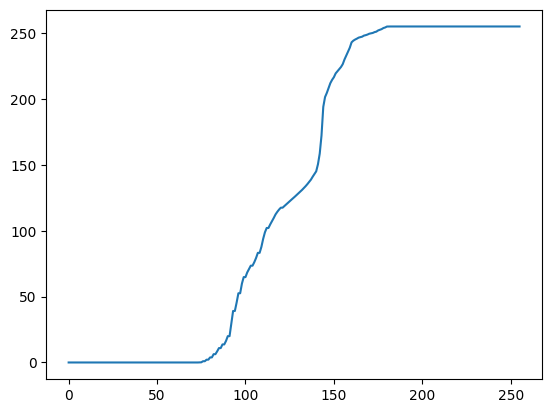

In [7]:
def cdf(data):
    data= iter(data)
    b=[next(data)]
    for i in data:
        b.append(b[-1]+i)
    return np.array(b)

cumsum = cdf(pdf)
print(len(cumsum))
plt.plot(cumsum*255)

In [8]:
cumsum=cumsum*255
scdf = cumsum.astype(int)
print(scdf)


[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   2   2   3   3   6   6   8  10  10  13  13  16
  19  19  29  39  39  45  52  52  59  64  64  68  70  73  73  76  79  83
  83  87  93  98 102 102 104 107 109 112 114 116 117 117 118 119 121 122
 123 124 125 127 128 129 130 132 133 135 137 138 140 142 145 150 158 172
 193 201 204 208 212 214 216 219 220 222 224 226 229 232 235 238 242 244
 245 245 246 246 247 248 248 248 249 249 250 250 251 251 252 252 253 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254 254
 254 254 254 254 254 254 254 254 254 254 254 254 25

In [9]:
new_img = scdf [flat]
print(len(new_img))
# plt.hist(new_img,bins=256)


101640


In [10]:
new_img = np.reshape(new_img, img_gray.shape)

True

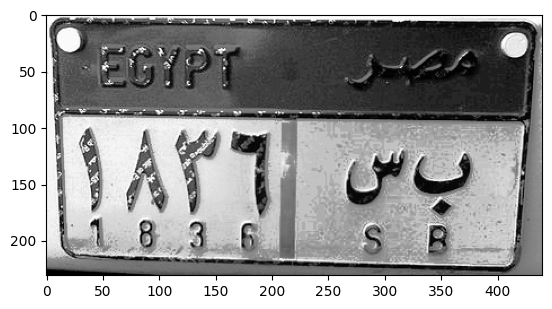

In [11]:
plt.imshow(new_img,cmap='gray')
cv2.imwrite("histogram_equilizer_img_1.png", new_img)